## Gaussian Processes and GP Regression

Here we will introduce Gaussian Processes, and regression using them. It will be brief and we will skip a lot of technical details. The aim is to get a feeling of roughly what they are, and how they can be used for regression.

To learn more, have a look at the resources listed here.

### Resources

The absolute best place to start is this index of notebooks on using GPy

http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/index.ipynb

The group maintaining GPy also teach Gaussian Processes on a regular basis here

http://gpss.cc/

They keep records of all their old meetings, with many slides and videos, which are all very educational

http://gpss.cc/past_meetings.html

A website collecting Gaussian Process resources is avaialable here (though it haven't been updated in 10 years it seems)

http://www.gaussianprocess.org/

That site also hosts the definititve book on Gaussian Processes, free to download

http://www.gaussianprocess.org/gpml/


In [2]:
%pylab inline
%run ../scrnatb/scrnatb/toolbox.py

Populating the interactive namespace from numpy and matplotlib


## Multivariate Gaussian Distributions

Let us start off by looking at multivariate Gaussians. These are described with a mean and a covariance matrix. Throughout, we will put the mean to be 0 for simplicity.

Now we sample some points from a 2D-Gaussian with.

In [68]:
Σ = np.array([[1., 0.8],
              [0.8, 1.]])

Y = np.random.multivariate_normal(np.zeros(2), Σ, 250)

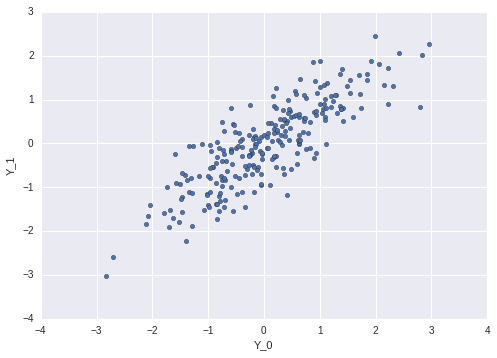

In [69]:
plt.scatter(Y[:, 0], Y[:, 1]);
sns.axlabel('Y_0', 'Y_1');

We could also plot samples both of the dimensions next to each other. That is, we are now putting the index of the samples on the X-axis.

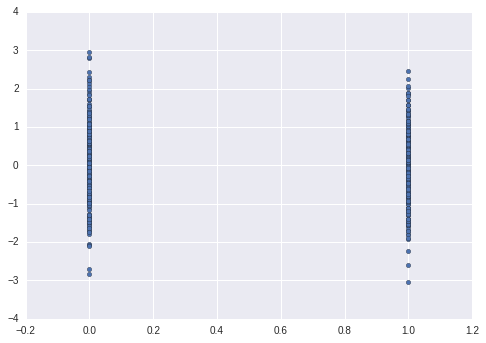

In [70]:
plt.scatter(0 * Y[:, 0], Y[:, 0]);
plt.scatter(0 * Y[:, 1] + 1, Y[:, 1]);

It's hard to see how they relate to each other. We'll look at a small number of the samples, and draw lines between them.

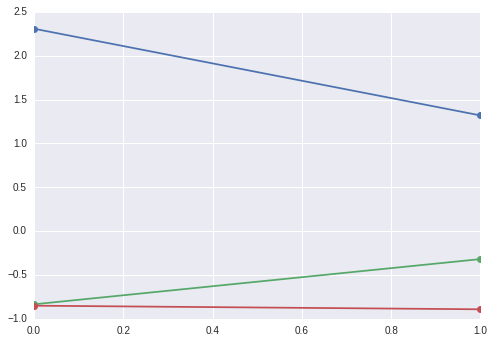

In [80]:
plt.plot(Y[:3].T, '-o');

For reference, the covarance matrix between these two dimensions can be visualized like this:

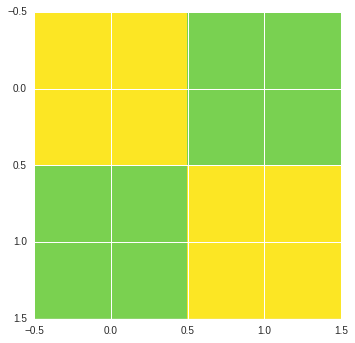

In [79]:
plt.imshow(Σ, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

In [81]:
import GPy

In [82]:
k = GPy.kern.RBF(1)

Now we go to higher dimensions. Here we take some samples from a 4-dimensional Gaussian.

We wouldn't be able to plot the 4 dimensions next to each other, so we use the strategy of plotting a few samples based on their dimensions, linked by lines.

In [83]:
n = 4
Σ = k.K(np.linspace(0., 3., n)[:, None])
Y = np.random.multivariate_normal(np.zeros(n), Σ, 250)

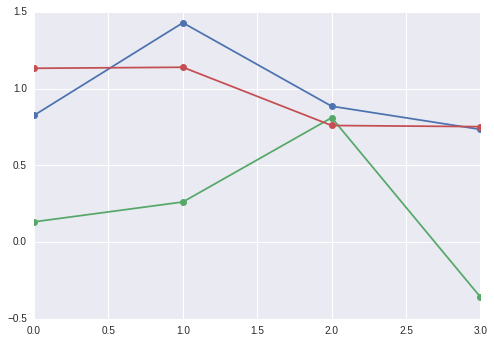

In [84]:
plt.plot(Y[:3].T, '-o');

For now ignore how the covariance matrix was created, but it looks like this

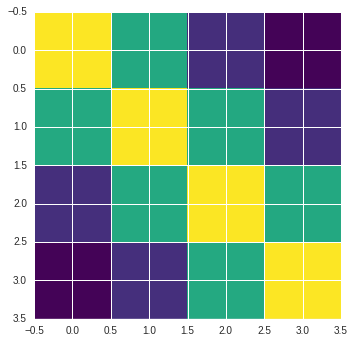

In [85]:
plt.imshow(Σ, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

Then try 8 dimensions

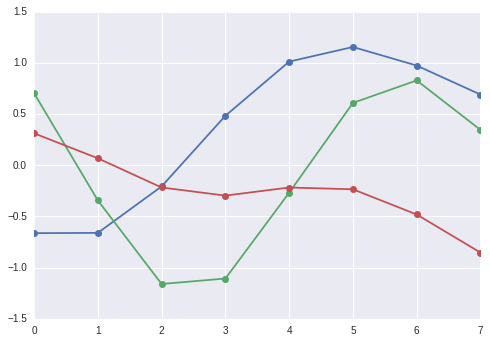

In [86]:
n = 8
Σ = k.K(np.linspace(0., 3., n)[:, None])
Y = np.random.multivariate_normal(np.zeros(n), Σ, 250)
plt.plot(Y[:3].T, '-o');

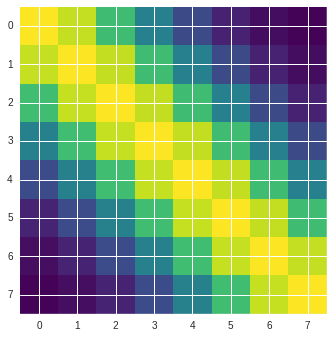

In [87]:
plt.imshow(Σ, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

And 20

 /nfs/research2/teichmann/valentine/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning:covariance is not positive-semidefinite.


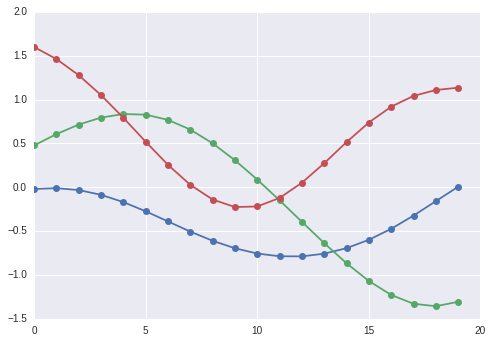

In [88]:
n = 20
Σ = k.K(np.linspace(0., 3., n)[:, None])
Y = np.random.multivariate_normal(np.zeros(n), Σ, 250)
plt.plot(Y[:3].T, '-o');

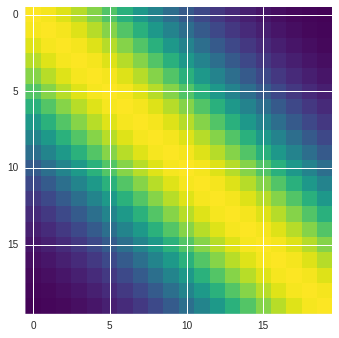

In [89]:
plt.imshow(Σ, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

What you might notice, is that it seems that with the high-dimensional Gaussians, each sample looks like a random but smooth curve.

And that is exactly the key!

The curves seem smooth, because of the structure of the covariance matrix. (Here, dimensions "close" to each other on the X-axis covary more).

If we let the number of dimensions in the multivaraite Gaussian be _infinite_, we get a **Gaussian Process**.

A Multivariate Gaussian is a distribution of n-dimensional vectors. A Gaussian Process is a distribution of _functions_.

Like a Multivariate Gaussian is determined by a covariance matrix, a Gaussian Process is determined by a _covariance function_.

We will only look at covariance functions which behave like above, but if you are intersted, see this page for a description of different ones: http://people.seas.harvard.edu/~dduvenaud/cookbook/

To perform Gaussian Process regression, we look at the distrobution of functions as defined by a covariance function as a _prior_ distribution. We then add in observations, and use some math to look at the _posterior_ dsitribution, given those observations.

We will be using a package called GPy which makes it easy to deal with these things, and have many covariance functions implemented.

To make the covariance functions above, we used a covariance function from GPy. (Also known as a _kernel_)

In [496]:
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


Let us go through this in a step-by-step way.

First sample a small number of observations from a very simple function

In [344]:
n = 5
X = np.linspace(0., 3., n)[:, None]
Y = np.sin(2 * X)

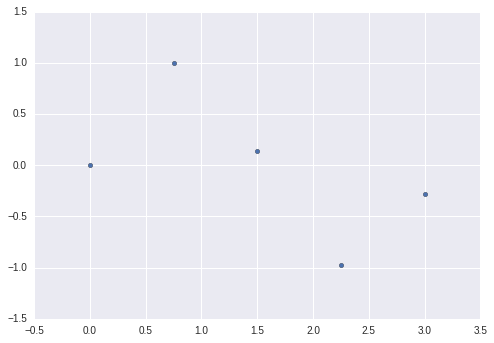

In [345]:
plt.scatter(X, Y);

We define a kernel, and make a Gaussian Process Regression model using the observations

In [383]:
k = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel=k)

In [384]:
model

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


We'll define a small number of points to evaluate the Gaussian Process on.

This shows what the covariance looks like.

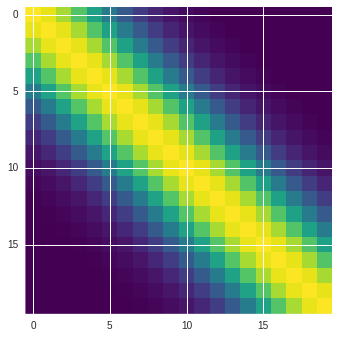

In [386]:
xn = np.linspace(-1., 4., 20)[:, None]
K = model.kern.K(xn)
plt.imshow(K, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

We can sample at the same point, to illustrate what the prior distribution of functions look like.

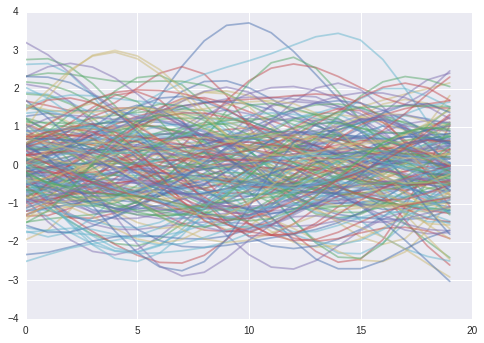

In [387]:
Ys = np.random.multivariate_normal(np.zeros(K.shape[0]), K, 200)
plt.plot(Ys.T, '-', alpha=0.5);

Now using the model, we can generate samples from the _posterior_, given our 5 observations.

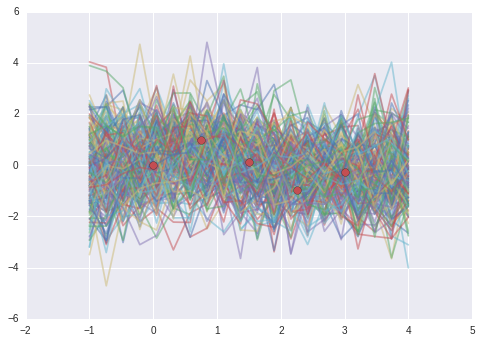

In [388]:
posterior_samples = model.posterior_samples(xn, size=200, full_cov=True)
plt.plot(xn, posterior_samples, '-', alpha=0.5);
plt.scatter(X, Y, zorder=3, c='r', s=60);

Plotting all the samples isn't so informative, we are interested in the _average_ function from the posterior distrubution. So we plot the _mean of the posterior_.

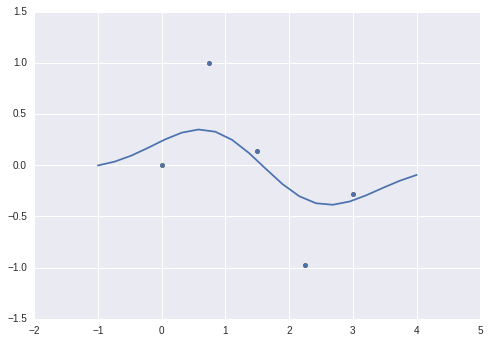

In [389]:
plt.plot(xn, model.predict(xn)[0]);
plt.scatter(X, Y);

This functionality is built in to the model object, and it will also plot the confidence interval.

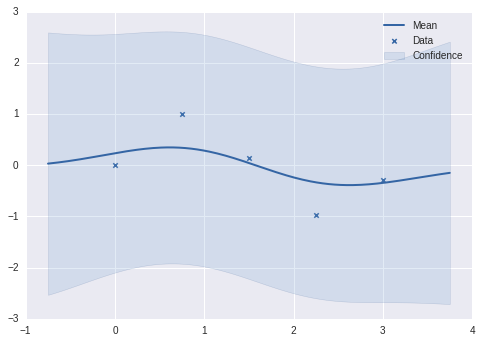

In [390]:
model.plot();

But hhis is a terrible model!

We can only see a brief wave pattern, and the confidence intervals are huge!

The good thing is, we can explicitly look at _how_ terrible the model is. This is done by looking at the log-likelihood of the data given the prior.

In [392]:
model.log_likelihood()

-6.6581140453574008

Better models have higher log-likelihood. You can't change your data. But, you can change the covariance function of the Gaussian Process. We need a covariance function which makes this number bigger.

Have a look at our covariance function.

In [394]:
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


The covariance function has two _hyper parameters_, changing these will change the behavior of the covariance function.

Roughly, for the RBF covariance function, the variance tells you about noise, and the lengthscale tells you about how quickly the underlying trend changes.

The best of these values for the given data can be objectively found by maximizing the log-likelihood. This is implemented directly in GPy models.

In [395]:
model.optimize()

In [397]:
model.log_likelihood()

-4.6855699503403887

In [398]:
model

GP_regression.,value,constraints,priors
rbf.variance,0.444074333035,+ve,
rbf.lengthscale,0.550050164842,+ve,
Gaussian_noise.variance,1.25433898421e-08,+ve,


The optimization procedure made the variance and lengthscale smaller. Let's look at matrix representation for comparison with above.

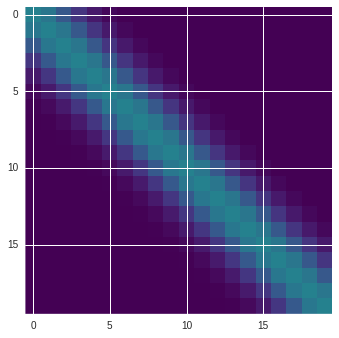

In [399]:
K = model.kern.K(xn)
plt.imshow(K, interpolation='none', cmap=cm.viridis, vmin=0., vmax=1.);

And let's look at the prior again, though it still just looks like a bunch of noise...

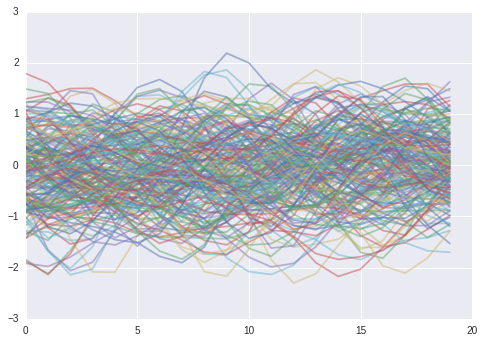

In [400]:
Ys = np.random.multivariate_normal(np.zeros(K.shape[0]), K, 200)
plt.plot(Ys[:200].T, '-', alpha=0.5);

Now, try again to sample from the posterior

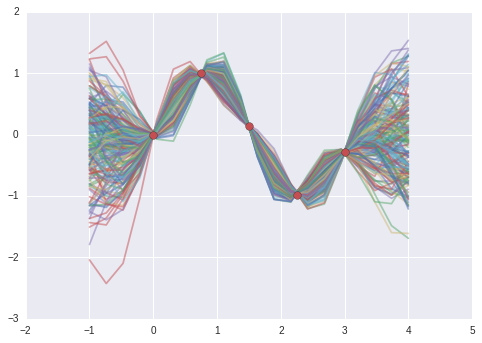

In [401]:
posterior_samples = model.posterior_samples(xn, size=200, full_cov=True)
plt.plot(xn, posterior_samples, '-', alpha=0.5);
plt.scatter(X, Y, zorder=3, c='r', s=60);

And to plot the mean and confidence intervals

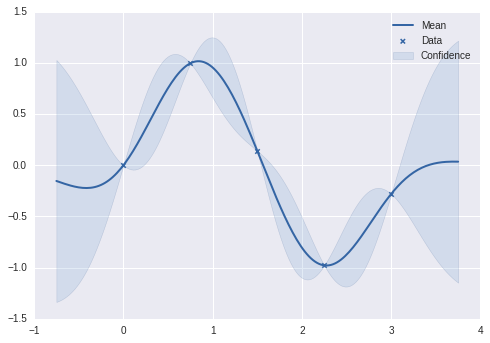

In [402]:
model.plot();

This is much better! Given just 5 observations, we have a very nice smooth uderlying trend. Not so far off from the sine curve we made the data from.We also see how the confidence is higher closer to the observations.

### Summary

- Gaussian Process is a distribution of functions
- They are described by covariance function
- Posterior of Gaussian Process describe possible functions given observations
- Mean of posterior describe underlying trend

- Gaussian Process Regression is _non-parametric_, data alone describes the regression.
  - But it is possible to put restrictions on the model based on prior beliefs, (for example physical laws).
  

In [403]:
%run ../scrnatb/scrnatb/gp_utils.py

<IPython.core.display.Javascript object>


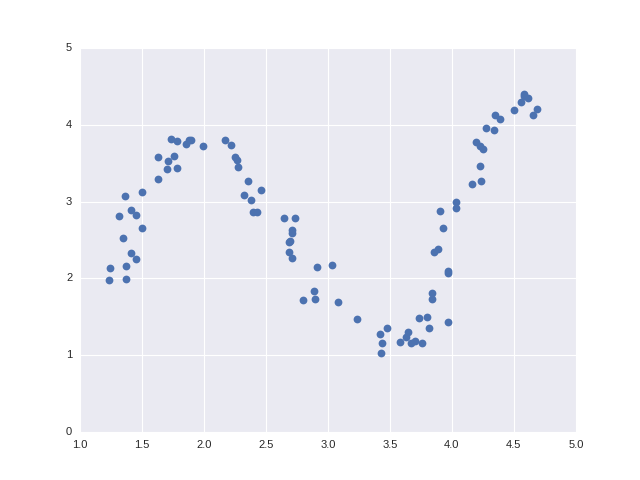

In [438]:
%matplotlib notebook
fig, ax = plt.subplots(1,1);

plt.xlim(1, 5)
plt.ylim(0, 5)

cc = point_sprayer(ax, std=0.08)

In [439]:
%matplotlib inline
XY = cc.return_points().T

In [486]:
XYs = XY[np.random.choice(range(XY.shape[0]), 10)]

In [487]:
m = GPy.models.GPRegression(XYs[:, [0]], XYs[:, [1]])

In [492]:
m.optimize()

In [493]:
m

GP_regression.,value,constraints,priors
rbf.variance,8.39435708729,+ve,
rbf.lengthscale,0.718330319704,+ve,
Gaussian_noise.variance,0.100595592107,+ve,


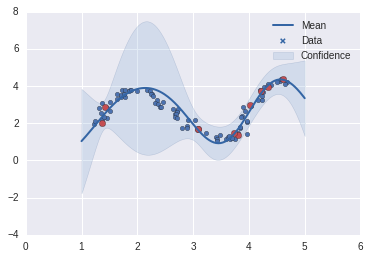

In [494]:
m.plot(plot_limits=[1., 5.]);
plt.scatter(*XY.T, c='b');
plt.scatter(*XYs.T, c='r', s=40);